In [1]:
def sobel_operator(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply the Sobel operator for horizontal and vertical edges
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Approximating the magnitude with the sum
    gradient_magnitude = np.abs(sobel_x) + np.abs(sobel_y)

    # Normalize the gradient magnitude to the range [0, 255]
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Threshold the gradient magnitude to identify regions of sharp difference
    _, sharp_regions = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)

    # Convert the result to uint8 type for display
    sharp_regions = np.uint8(sharp_regions)

    # blurring for noise reduction
    sharp_regions = cv2.GaussianBlur(sharp_regions, (7, 7), 0)

    return sharp_regions

def apply_erosion_and_dilation(binary_image, kernel_size=(5, 5), iterations_erosion=1, iterations_dilation=1):
    # Define a structuring element
    kernel = np.ones(kernel_size, np.uint8)

    # Apply erosion
    eroded_image = cv2.erode(binary_image, kernel, iterations=iterations_erosion)

    # Apply dilation
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=iterations_dilation)

    # blurring for noise reduction
    dilated_image = cv2.GaussianBlur(dilated_image, (5, 5), 0)

    return dilated_image

def gamma_correction(image, gamma):

    # Convert image to numpy array for efficient manipulation
    img_array = np.array(image)

    # Perform gamma correction
    corrected_img_array = np.power(img_array / 255.0, gamma) * 255.0

    return corrected_img_array

(-0.5, 1439.5, 1079.5, -0.5)

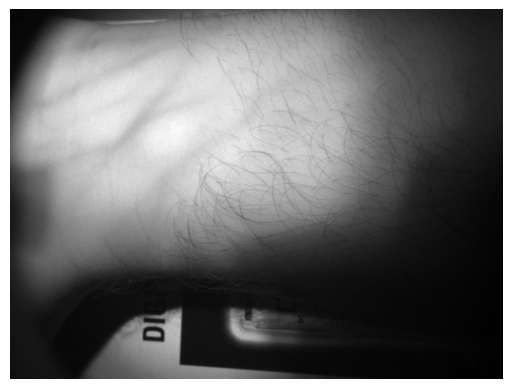

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread('/content/left16.png', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5,5), 0)

plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

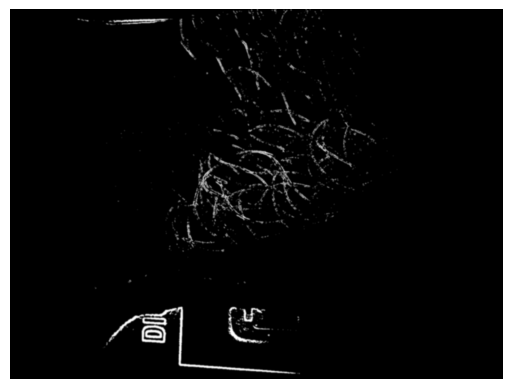

In [11]:
new_img = sobel_operator(blurred_image)
# new_img = apply_erosion_and_dilation(new_img)

plt.imshow(new_img, cmap='gray')
plt.axis('off')

In [13]:
result = cv2.inpaint(image, new_img, inpaintRadius=2, flags=cv2.INPAINT_TELEA)

gamma_value = 1.2

corrected_image = gamma_correction(result, gamma_value)

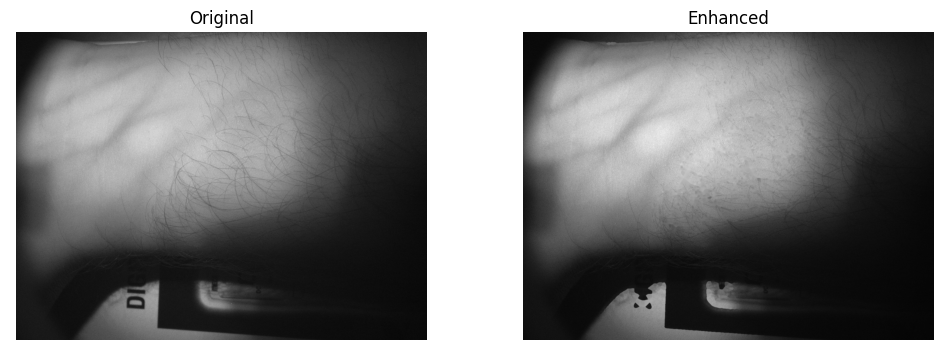

In [14]:
# Create a figure with equal aspect ratio
plt.figure(figsize=(12, 4))

# Plot the first image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('equal')  # Set aspect ratio to be equal
plt.axis('off')  # Set aspect ratio to be equal

# Plot the second image
plt.subplot(1, 2, 2)
plt.imshow(corrected_image, cmap='gray')
plt.title('Enhanced')
plt.axis('equal')  # Set aspect ratio to be equal
plt.axis('off')  # Set aspect ratio to be equal

# Show the plot
plt.show()